In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have defined a clean_text function for preprocessing
def clean_text(text):
    # Implement your text cleaning process here
    # Example: lowercasing, removing punctuation, etc.
    return text

# Load your dataset (adjust the path as per your environment)
df = pd.read_csv("C:/Users/komat/Downloads/archive (4)/spam.csv", encoding='latin-1')

# Assuming the dataset has columns 'v1' for label and 'v2' for text
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Data preprocessing - cleaning text
df['clean_text'] = df['text'].apply(clean_text)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(max_iter=1000)
svm_classifier = SVC()

# Function to train and evaluate models
def train_and_evaluate(classifier):
    classifier.fit(X_train_tfidf, y_train)
    y_pred = classifier.predict(X_test_tfidf)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    

# Train and evaluate models
print("Naive Bayes Classifier:")
train_and_evaluate(nb_classifier)

print("\nLogistic Regression Classifier:")
train_and_evaluate(lr_classifier)

print("\nSupport Vector Machine Classifier:")
train_and_evaluate(svm_classifier)


Naive Bayes Classifier:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

[[965   0]
 [ 42 108]]

Logistic Regression Classifier:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

[[964   1]
 [ 37 113]]

Support Vector Machine Classifier:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.87      0.93       150

    accuracy                           0.98

Classification Report for Naive Bayes Classifier:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



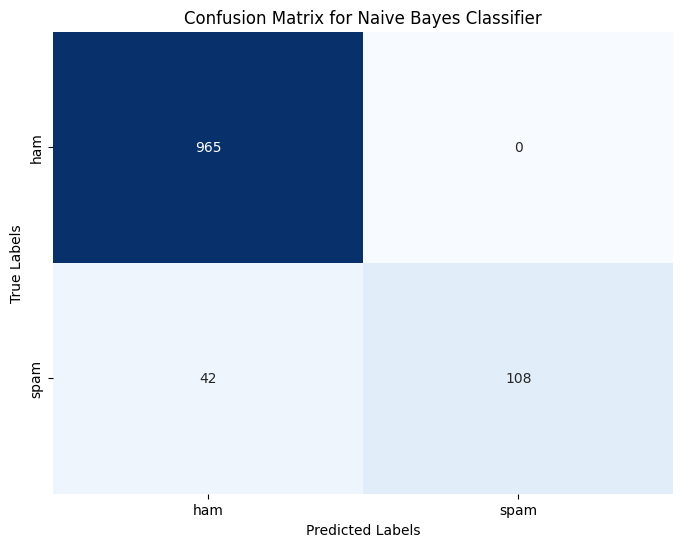

Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



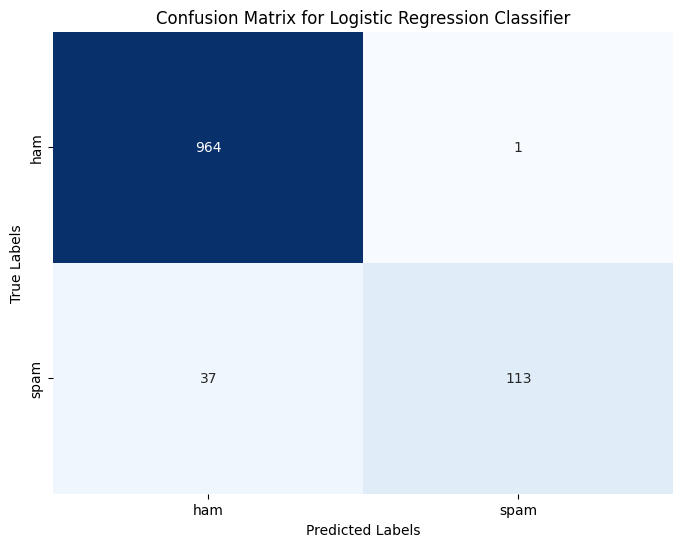

Classification Report for Support Vector Machine Classifier:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



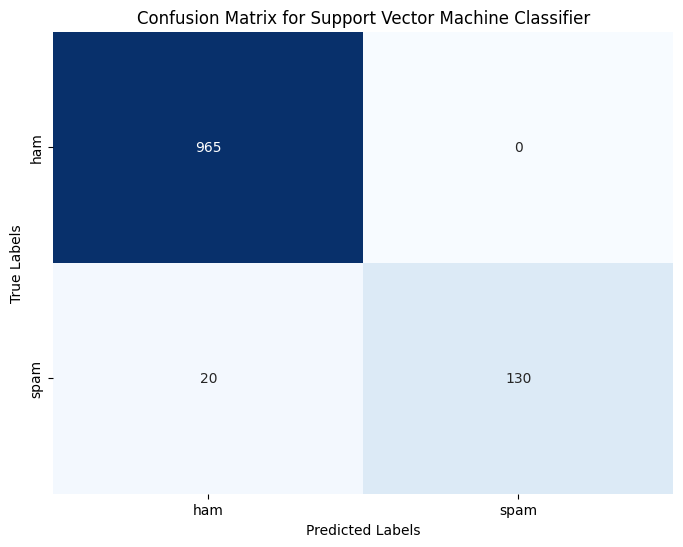

In [18]:
def train_and_evaluate(classifier, classifier_name):
    classifier.fit(X_train_tfidf, y_train)
    y_pred = classifier.predict(X_test_tfidf)
    print(f"Classification Report for {classifier_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classifier.classes_, yticklabels=classifier.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.show()

# Train and evaluate models with visualization
train_and_evaluate(nb_classifier, "Naive Bayes Classifier")
train_and_evaluate(lr_classifier, "Logistic Regression Classifier")
train_and_evaluate(svm_classifier, "Support Vector Machine Classifier")

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Example sentences to test
sentences = [
    "Congratulations! You've won a free cruise trip!",
    "Hello, how are you doing today?",
    "URGENT: Your mobile number has won £5000, claim today!",
    "Reminder: Meeting tomorrow at 10 AM."
]

df = pd.read_csv("C:/Users/komat/Downloads/archive (4)/spam.csv", encoding='latin-1')

df = df.rename(columns={'v1': 'label', 'v2': 'text'})

df['clean_text'] = df['text'].apply(clean_text)

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])
y_labels = df['label']

nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(max_iter=1000)
svm_classifier = SVC()

nb_classifier.fit(X_tfidf, y_labels)
lr_classifier.fit(X_tfidf, y_labels)
svm_classifier.fit(X_tfidf, y_labels)

def predict_sentence(sentence, classifier):
    sentence_cleaned = clean_text(sentence)
    sentence_tfidf = tfidf_vectorizer.transform([sentence_cleaned])
    prediction = classifier.predict(sentence_tfidf)
    return prediction[0]

for sentence in sentences:
    print(f"Sentence: {sentence}")
    print("Naive Bayes Classifier Prediction:", predict_sentence(sentence, nb_classifier))
    print("Logistic Regression Classifier Prediction:", predict_sentence(sentence, lr_classifier))
    print("Support Vector Machine Classifier Prediction:", predict_sentence(sentence, svm_classifier))
    print()  # Print empty line for separation


Sentence: Congratulations! You've won a free cruise trip!
Naive Bayes Classifier Prediction: ham
Logistic Regression Classifier Prediction: ham
Support Vector Machine Classifier Prediction: ham

Sentence: Hello, how are you doing today?
Naive Bayes Classifier Prediction: ham
Logistic Regression Classifier Prediction: ham
Support Vector Machine Classifier Prediction: ham

Sentence: URGENT: Your mobile number has won £5000, claim today!
Naive Bayes Classifier Prediction: spam
Logistic Regression Classifier Prediction: spam
Support Vector Machine Classifier Prediction: spam

Sentence: Reminder: Meeting tomorrow at 10 AM.
Naive Bayes Classifier Prediction: ham
Logistic Regression Classifier Prediction: ham
Support Vector Machine Classifier Prediction: ham

